# Aplicación de la Distribución Geométrica en Python

## Caso de Uso: Lanzamiento de una moneda

In [1]:
from scipy.stats import geom
p = 0.5  # Probabilidad de cara

# Crear distribución geométrica
dist_geom = geom(p)

# Probabilidad de éxito en el 4to intento
prob_4 = dist_geom.pmf(4)
print(f"P(X=4) = {prob_4:.4f}")

P(X=4) = 0.0625


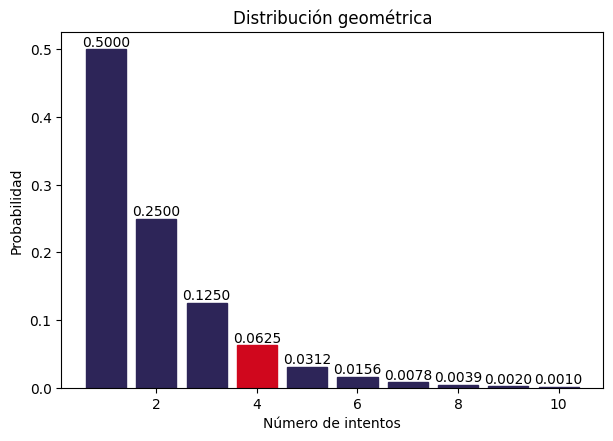

In [2]:
# Graficamos la distribución

import matplotlib.pyplot as plt

# Generamos los datos
x = range(1, 11)
y = [dist_geom.pmf(i) for i in x]

# Creamos el gráfico
fig, ax = plt.subplots()
bars = ax.bar(x, y)

# Personalizamos el color de las barras
for bar in bars:
    bar.set_color('#2D2558') # blue
    if bar.get_height() == 0.0625:
        bar.set_color('#D0071D') # red

# Agregamos etiquetas al gráfico
ax.bar_label(bars, fmt='%.4f')

# Ajustamos el tamaño de las etiquetas
fig.tight_layout()

# Ajustamos el tamaño del gráfico
fig.set_size_inches(6, 4)

# Personalizamos el gráfico
plt.xlabel("Número de intentos")
plt.ylabel("Probabilidad")
plt.title("Distribución geométrica")
plt.show()


## Caso de Uso: Marketing por correo electrónico

Imagina que eres el responsable de marketing de una empresa y estás enviando una campaña de correo electrónico para promocionar un nuevo producto. Te interesa saber:

* ¿Cuántos correos electrónicos necesitas enviar en promedio para conseguir la primera venta?
* ¿Cuál es la probabilidad de que la primera venta ocurra después de enviar un cierto número de correos?


Aquí es donde entra en juego la distribución geométrica:

* **Ensayo de Bernoulli**: Cada correo electrónico enviado es un ensayo de Bernoulli, donde el "éxito" es que el destinatario compre el producto y el "fracaso" es que no lo haga.
* **Probabilidad de éxito (p)**: Esta es la tasa de conversión de tu campaña de correo electrónico (porcentaje de destinatarios que compran).
* **Variable aleatoria (X)**: El número de correos electrónicos enviados hasta obtener la primera venta.

In [3]:
import numpy as np
from scipy.stats import geom
import pandas as pd

def simular_campana_email(num_emails, tasa_conversion):
    """Simula una campaña de email y devuelve el número de emails hasta la primera venta."""
    dist_geom = geom(tasa_conversion)
    emails_hasta_venta = dist_geom.rvs()  # Genera una muestra aleatoria
    return min(emails_hasta_venta, num_emails)  # Limita al número total de emails

# Parámetros de la simulación
num_emails_total = 10000  # Número total de emails a enviar
tasa_conversion = 0.02   # Tasa de conversión (2%)

# Simulación de la campaña
resultados = []
for _ in range(1000):  # Simular 1000 campañas
    emails_hasta_venta = simular_campana_email(num_emails_total, tasa_conversion)
    resultados.append(emails_hasta_venta)

# Análisis de los resultados
promedio_emails = np.mean(resultados)
probabilidad_venta_antes_de_100 = sum(1 for r in resultados if r < 100) / len(resultados)

print(f"Promedio de emails hasta la primera venta: {promedio_emails:.2f}")
print(f"Probabilidad de venta antes de enviar 100 emails: {probabilidad_venta_antes_de_100:.2%}")


Promedio de emails hasta la primera venta: 47.92
Probabilidad de venta antes de enviar 100 emails: 88.20%


In [4]:
# Crear un array `x` con los valores únicos de `resultados`.
x = np.unique(resultados)

# Crear una distribución geométrica `dist_geom` con la `tasa_conversion`.
dist_geom = geom(tasa_conversion)

# Calcular las probabilidades teóricas para cada valor en `x` usando la función `pmf` de `dist_geom` y guardarlas en `probabilidades`.
probabilidades = dist_geom.pmf(x)

# Crear un diccionario `data` con los datos `x`, `probabilidades` (teóricas) y las frecuencias de cada valor en `resultados`.
data = {
    'x': x,
    'Probabilidad teórica': probabilidades,
    'Frecuencia de muestras': np.bincount(resultados)[x]
}

# Crear un DataFrame `df` a partir del diccionario `data`.
df = pd.DataFrame(data)

# Mostramos la forma del DataFrame
df.shape

(171, 3)

In [5]:
# Mostramos el DataFrame
df.head()

,x,Probabilidad teórica,Frecuencia de muestras
0,1,0.020000,20
1,2,0.019600,15
2,3,0.019208,24
3,4,0.018824,26
4,5,0.018447,23


In [6]:
# Transformar el DataFrame `df` a un formato largo para facilitar la visualización, donde las columnas sean 'x', 'Tipo' y 'Probabilidad'.
df_melted = df.melt('x', var_name='Tipo', value_name='Probabilidad')

# Mostramos la forma del DataFrame melted
df_melted.shape

(342, 3)

In [7]:
# Mostrar el DataFrame resultante
df_melted.head()

,x,Tipo,Probabilidad
0,1,Probabilidad teórica,0.020000
1,2,Probabilidad teórica,0.019600
2,3,Probabilidad teórica,0.019208
3,4,Probabilidad teórica,0.018824
4,5,Probabilidad teórica,0.018447


In [8]:
df_melted[df_melted['Tipo'] == 'Frecuencia de muestras'].head()

,x,Tipo,Probabilidad
171,1,Frecuencia de muestras,20.0
172,2,Frecuencia de muestras,15.0
173,3,Frecuencia de muestras,24.0
174,4,Frecuencia de muestras,26.0
175,5,Frecuencia de muestras,23.0


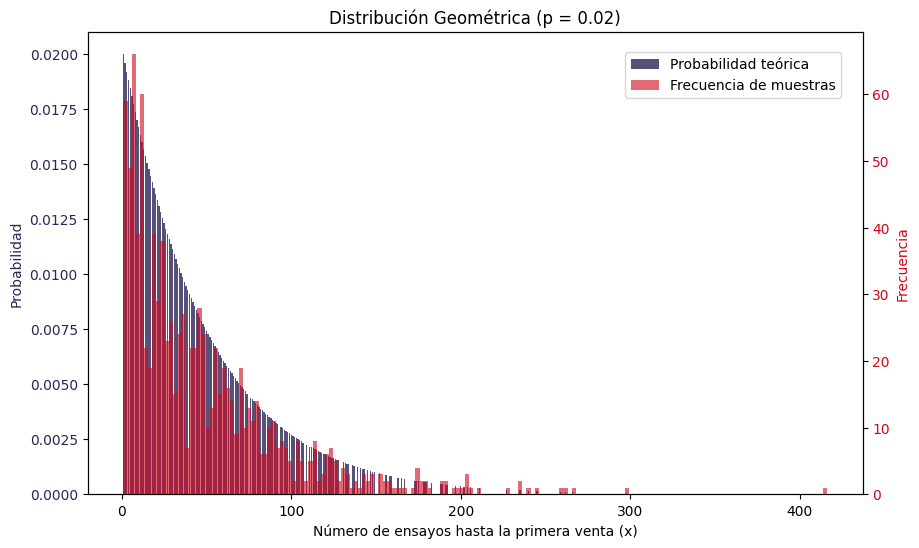

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de la simulación (resultados, x, probabilidades) - obtenidos del código anterior

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje Y secundario para la frecuencia
ax2 = ax1.twinx()

# colores
_blue = '#2D2558'
_red = '#D0071D'

# Gráfico de barras para las probabilidades teóricas (eje Y primario)
ax1.bar(x, probabilidades, color=_blue, alpha=.8, label='Probabilidad teórica')
ax1.set_ylabel('Probabilidad', color=_blue)
ax1.tick_params(axis='y', labelcolor=_blue)

# Histograma para las muestras aleatorias (eje Y secundario)
ax2.hist(resultados, bins=len(x), density=False, color=_red, alpha=.6, label='Frecuencia de muestras')
ax2.set_ylabel('Frecuencia', color=_red)
ax2.tick_params(axis='y', labelcolor=_red)

# Configuración del gráfico
plt.title(f'Distribución Geométrica (p = {tasa_conversion})')
ax1.set_xlabel('Número de ensayos hasta la primera venta (x)')
fig.legend(loc=(.68, .82))  # Leyenda combinada

# Mostrar el gráfico
plt.show()

### Interpretación del gráfico:

#### Barras azules (Probabilidad teórica):
* Cada barra representa la probabilidad teórica de obtener la primera venta en un número específico de emails enviados, según la distribución geométrica con una tasa de conversión del 2% (p = 0.02).
* La altura de cada barra indica la probabilidad. Por ejemplo, la barra más alta (alrededor de 0.02) corresponde a la probabilidad de obtener la primera venta en el primer email enviado.
* Observa cómo las probabilidades disminuyen a medida que aumenta el número de emails, lo cual es característico de la distribución geométrica. Esto significa que es más probable obtener la primera venta antes que después.

#### Barras rojas (Frecuencia de muestras):
* Cada barra representa la frecuencia con la que se obtuvo la primera venta en un número específico de emails en las 1000 simulaciones de la campaña.
* La altura de cada barra indica cuántas veces ocurrió ese resultado en las simulaciones. Por ejemplo, si la barra en x = 50 tiene una altura de 20, significa que en 20 de las 1000 simulaciones, la primera venta se logró después de enviar 50 emails.
* El histograma nos da una idea de cómo se distribuyen los resultados de la simulación en la práctica.

### Resultados
#### Toma de decisiones:
En este caso, el gráfico muestra que la mayoría de las primeras ventas ocurren en los primeros 100 emails enviados (87.80 %). La probabilidad de obtener la primera venta después de 200 emails es muy baja. Lo anterior, podría ayudar a tomar decisiones sobre el tamaño de la campaña y cuándo detenerla si no se están obteniendo los resultados esperados.

* **Optimizar tu presupuesto:** Decidir cuántos correos electrónicos enviar en función del costo por correo y el valor esperado de cada venta.
* **Ajustar tu estrategia**: Si la probabilidad de obtener la primera venta después de un cierto número de correos es baja, puedes considerar cambiar el contenido del correo electrónico, la segmentación de la audiencia, etc.

## Conclusiones
Importancia de la Distribución Geométrica
* **Modelado de eventos raros y esperados**: Las distribuciones geométricas son ideales para modelar situaciones donde nos interesa el número de intentos necesarios para obtener un primer éxito en una serie de ensayos independientes con probabilidad constante de éxito. Esto es especialmente útil en áreas como control de calidad, análisis de fallos y experimentos científicos [3].
* **Sencillez y aplicabilidad**: A pesar de su simplicidad matemática, las distribuciones geométricas ofrecen una herramienta poderosa y flexible para modelar una amplia gama de fenómenos del mundo real. Python facilita su uso a través de la biblioteca SciPy [2].
* **Base para otras distribuciones**: Las distribuciones geométricas son la base de otras distribuciones de probabilidad importantes, como la distribución binomial negativa, que amplía el concepto a múltiples éxitos [3]. Comprender la distribución geométrica proporciona una base sólida para explorar modelos probabilísticos más complejos

## Referencias
* [1] M. Plaue, Data Science: An Introduction to Statistics and Machine Learning. Ber-lin, Heidelberg: Springer Berlin Heidelberg, 2023, ISBN: 978-3-662-67881-7 978-3-662-67882-4. DOI: 10.1007/978-3-662-67882-4. dirección: https://link.springer.com/10.1007/978-3-662-67882-4 (visitado 21-06-2024).
* [2] P. Virtanen, R. Gommers, T. E. Oliphant et al., «SciPy 1.0: Fundamental algorithms for scientific computing in python,» Nature Methods, vol. 17, n.o 3, págs. 261-272, 2 de mar. de 2020, ISSN: 1548-7091, 1548-7105. DOI: 10.1038/s41592-019-0686-2. dirección: https://www.nature.com/articles/s41592-019-0686-2 (visitado
20-06-2024).
* [3] R. S. Kenett, S. Zacks y P. Gedeck, Modern Statistics: A Computer-Based Approach with Python (Statistics for Industry, Technology, and Engineering). Cham: Springer International Publishing, 2022, ISBN: 978-3-031-07565-0 978-3-031-07566-7. DOI: 10.1007/978-3-031-07566-7. dirección: https://link.springer.com/10.1007/978-3-031-07566-7 (visitado 20-06-2024).